11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Before reshape:
  x_train shape: (60000, 28, 28)
  x_test  shape: (10000, 28, 28)

After reshape:
  x_train shape: (60000, 28, 28, 1)
  x_test  shape: (10000, 28, 28, 1)
  y_train shape: (60000, 10)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)


Training CNN...
Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 62s 71ms/step - accuracy: 0.8396 - loss: 0.5032 - val_accuracy: 0.9835 - val_loss: 0.0563
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 59s 70ms/step - accuracy: 0.9721 - loss: 0.0927 - val_accuracy: 0.9877 - val_loss: 0.0435
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 58s 69ms/step - accuracy: 0.9792 - loss: 0.0685 - val_accuracy: 0.9898 - val_loss: 0.0403
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 85s 72ms/step - accuracy: 0.9840 - loss: 0.0557 - val_accuracy: 0.9917 - val_loss: 0.0335
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 59s 69ms/step - accuracy: 0.9871 - loss: 0.0409 - val_accuracy: 0.9913 - val_loss: 0.0354
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 59s 70ms/step - accuracy: 0.9877 - loss: 0.0368 - val_accuracy: 0.9898 - val_loss: 0.0390
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - accuracy: 0.9900 - loss: 0.0327 - val_accuracy: 0.9907 - val_loss: 0.0324
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 71ms/step - accuracy: 0.9916 

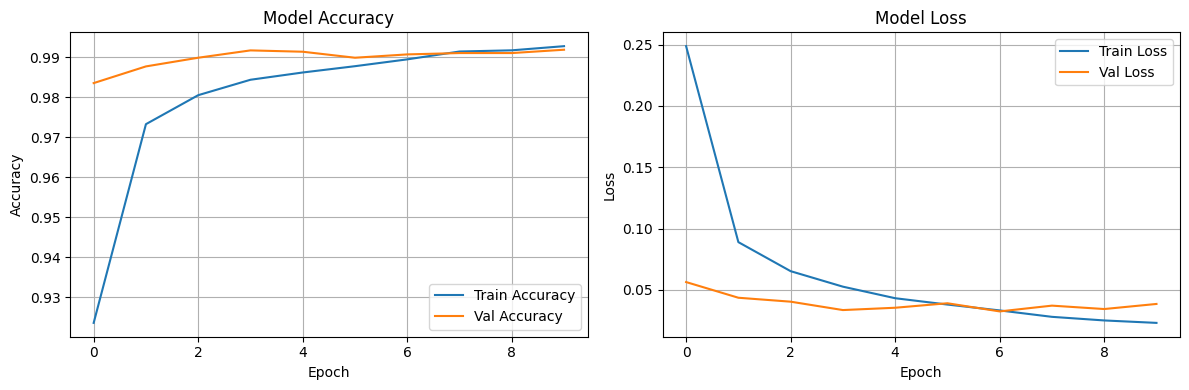

Training history plot saved as 'training_history.png'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step

Sample Predictions (first 10 test images):
  Predicted: [7 2 1 0 4 1 4 9 5 9]
  Actual:    [7 2 1 0 4 1 4 9 5 9]


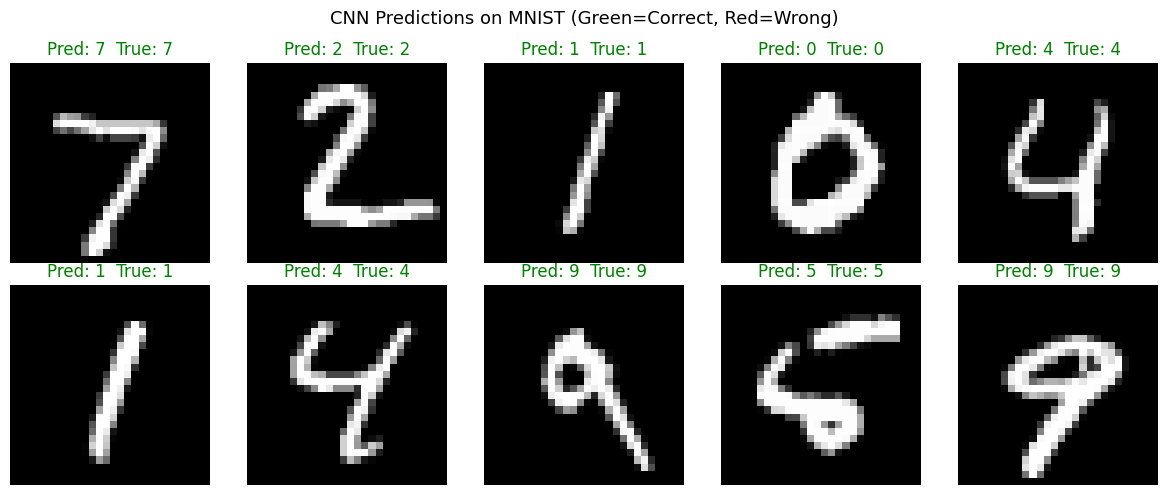

Prediction plot saved as 'predictions.png'

Model saved as 'cnn_mnist_model.h5'


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


# ─────────────────────────────────────────
# STEP 1: Load Dataset
# ─────────────────────────────────────────
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Before reshape:")
print(f"  x_train shape: {x_train.shape}")   # (60000, 28, 28)
print(f"  x_test  shape: {x_test.shape}")    # (10000, 28, 28)


# ─────────────────────────────────────────
# STEP 2: Preprocess Data
# ─────────────────────────────────────────

# Reshape: CNN needs 4D input → (samples, height, width, channels)
# channels = 1 because MNIST is grayscale
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

# Normalize pixel values from [0, 255] → [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

# One-hot encode labels  e.g., 3 → [0,0,0,1,0,0,0,0,0,0]
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test,  num_classes=10)

print("\nAfter reshape:")
print(f"  x_train shape: {x_train.shape}")   # (60000, 28, 28, 1)
print(f"  x_test  shape: {x_test.shape}")    # (10000, 28, 28, 1)
print(f"  y_train shape: {y_train.shape}")   # (60000, 10)


# ─────────────────────────────────────────
# STEP 3: Build CNN Model
# ─────────────────────────────────────────
model = Sequential([

    # ── Block 1 ──────────────────────────
    # Conv Layer 1: 32 filters of size 3x3
    # Learns low-level features: edges, lines
    Conv2D(32, kernel_size=(3, 3), activation='relu',
           padding='same', input_shape=(28, 28, 1)),
    # Output: (28, 28, 32)

    # MaxPooling: reduces spatial size by half
    MaxPooling2D(pool_size=(2, 2)),
    # Output: (14, 14, 32)

    # ── Block 2 ──────────────────────────
    # Conv Layer 2: 64 filters of size 3x3
    # Learns high-level features: curves, shapes
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    # Output: (14, 14, 64)

    MaxPooling2D(pool_size=(2, 2)),
    # Output: (7, 7, 64)

    # ── Classifier ───────────────────────
    # Flatten 3D feature maps → 1D vector
    Flatten(),
    # Output: 7 * 7 * 64 = 3136

    # Fully connected layer
    Dense(128, activation='relu'),

    # Dropout: randomly drop 50% neurons to prevent overfitting
    Dropout(0.5),

    # Output layer: 10 neurons (one per digit), softmax gives probabilities
    Dense(10, activation='softmax')
])


# ─────────────────────────────────────────
# STEP 4: Compile Model
# ─────────────────────────────────────────
model.compile(
    optimizer='adam',                    # Adaptive learning rate optimizer
    loss='categorical_crossentropy',     # For multi-class classification
    metrics=['accuracy']
)

model.summary()


# ─────────────────────────────────────────
# STEP 5: Train Model
# ─────────────────────────────────────────
print("\nTraining CNN...")
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,    # 10% of training data used for validation
    verbose=1
)


# ─────────────────────────────────────────
# STEP 6: Evaluate on Test Data
# ─────────────────────────────────────────
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Loss:     {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}  ({test_acc*100:.2f}%)")


# ─────────────────────────────────────────
# STEP 7: Plot Training History
# ─────────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axes[0].plot(history.history['accuracy'],     label='Train Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Val Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Loss plot
axes[1].plot(history.history['loss'],     label='Train Loss')
axes[1].plot(history.history['val_loss'], label='Val Loss')
axes[1].set_title('Model Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()
print("Training history plot saved as 'training_history.png'")


# ─────────────────────────────────────────
# STEP 8: Predict on Sample Images
# ─────────────────────────────────────────
predictions = model.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)
true_labels      = np.argmax(y_test[:10], axis=1)

print("\nSample Predictions (first 10 test images):")
print(f"  Predicted: {predicted_labels}")
print(f"  Actual:    {true_labels}")

# Visualize predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
    ax.set_title(f"Pred: {predicted_labels[i]}  True: {true_labels[i]}", color=color)
    ax.axis('off')

plt.suptitle('CNN Predictions on MNIST (Green=Correct, Red=Wrong)', fontsize=13)
plt.tight_layout()
plt.savefig('predictions.png')
plt.show()
print("Prediction plot saved as 'predictions.png'")


# ─────────────────────────────────────────
# STEP 9: Save the Model (optional)
# ─────────────────────────────────────────
model.save('cnn_mnist_model.h5')
print("\nModel saved as 'cnn_mnist_model.h5'")